## Instructions
- See deadline on the course web page
- This problem set is solved individually. See examination rules on the course web page and the explanation of the examination procedure below.
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on. The extra problems are usually more challenging.
- Students are allowed to discuss together and help each other when solving the problems. However, every student must understand their submitted solution in the sense that they should be able to explain and discuss them with a peer or with a teacher.
- While discussions with your peers are allowed (and even encouraged), direct plagiarism is not. Every student must reach their own understanding of submitted solutions according to the definition in the previous point.
- The use of coding assistance from code generating artificial intelligence tools is allowed. However, every student must reach their own understanding of submitted solutions (including employed algorithms) according to the definition above.
- Some problems include checkpoints in the form of `assert` statements. These usually check some basic functionality and you should make sure that your code passes these statements without raising an `AssertionError`. 
- Do not use other python modules than the ones included in the `environment.yml` file in the course github repo. 

- **Important:** The grading of problem sets requires **all** of the following actions:
  1. Make sure to always complete **Task 0** in the header part of the notebook and that this part does not raise any `AssertionError`(s).
  1. **Complete** the corresponding questions in Yata for every task that you have completed. This usually involves copying and pasting some code from your solution notebook and passing the code tests. You need to have a green check mark on Yata to get the corresponding points.
  1. **Upload** your solution in the form of your edited version of this Jupyter notebook via the appropriate assignment module in Canvas (separate for basic and extra tasks). It is the code and results in your submitted notebook that is considered to be your hand-in solution.
  1. If selected, be **available for a discussion** of your solution with one of the teachers on the Monday afternoon exercise session directly following the problem set deadline. No extra preparation is needed for these discussions apart from familiarity with your own solution. A list of randomly selected students will be published on the course web page around Monday noon. During the afternoon session that same day, students will be called in the numbered order until the end of the list (or the end of the exercise session). You must inform the responsible teacher as soon as possible following the publication of the student list if you can not be physically present at the exercise session (in which case we will have the discussion on zoom). An oral examination (on all aspects of the course) will be arranged during the exam week for students that do not show up for their discussion slot, or that fail to demonstrate familiarity with their hand-in solutions.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)

By changing the below boolean variable `student_self_assessment` to `True` you attest that:
- All handed in solutions were produced by yourself in the sense that you understand your solutions and should be able to explain and discuss them with a peer or with a teacher.


In [1]:
student_self_assessment = False

# 
# YOUR CODE HERE
# 
student_self_assessment = True

In [2]:
assert student_self_assessment == True, 'You must assert the individual solution statements.'

# Problem Set 2 (Basic problems)
**Learning from data [TIF285], Chalmers, Fall 2025**

Last revised: 16-Sep-2025 by Christian Forssén [christian.forssen@chalmers.se]

In [6]:
import os
# Data files are stored in
DATA_DIR = "DataFiles/"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Problem 1: Coin tossing (2 points)

**Task (see also Yata):** Define a function `bayesian_analysis_coin_flips` (see start code below) that returns the mean, median, and 68%/95% credible intervals of the Bayesian posterior with an input data array of coin flips and using a uniform $[0,1]$ prior for `pH` (probability of heads).

**Task (mainly for testing your code; not on Yata)** Read the data with simulated coin tosses from the file `cointosses.dat`.
Each row corresponds to a single toss: 0=tails; 1=heads

Extract the mean and the 95% credible intervals (Degree-of-belief or DoB intervals) from the first 8 tosses, the first 64 tosses, the first 512 tosses and all 4096 tosses in the data assuming a uniform prior for the probability $p_H$ of obtaining heads in a single toss.

*Hint*: Sample code for computing the DoB interval is available in the lecture notes: "Demonstration: Bayesian Coin Tossing". The tests below will fail if you use a too sparse grid when assigning point esitmates and credible intervals. Use at least 1000 mesh points for evaluating $p(p_H|D,I)$.

**Task (see also Yata):** Check how the width ($d_{68}$) of your 68% credible interval depends on the number of coin tosses ($N$) that is included in the data likelihood. It should be some power-law dependence: $d_{68} \propto N^p$; but which power $p$? What do you expect and what do you find?

*Hint*: You might want to make a logarithmic plot.

In [2]:
# importing modules

import numpy as np
import matplotlib.pyplot as plt
#...

# 
# YOUR CODE HERE
# 
import scipy as scipy
import scipy.stats as stats
import pandas as pd
import emcee as emcee

In [3]:
# Read data
data = np.loadtxt(f'{DATA_DIR}/PS2_Prob1_cointosses.txt')

NameError: name 'DATA_DIR' is not defined

In [6]:
# Optional. 
# Insert utility code / functions here.

# 
# YOUR CODE HERE
# 
def prior(pH):
    prior = np.zeros_like(pH)
    prior[(0<=pH)&(pH<=1)]=1 
    return prior

def likelihood(pH, data_coin):
    N = len(data_coin)
    n = sum(data_coin)
    likelihood = pH**n*(1-pH)**(N-n)
    return likelihood

def posterior(pH, data_coin):
    posterior = prior(pH)*likelihood(pH, data_coin)
    norm = np.trapezoid(posterior)
    return posterior/norm

In [7]:
# Define a function that returns the mean, median, and 68%/95% credible intervals 
# of the Bayesian posterior with an input data array of coin flips 
# and using a uniform [0,1] prior for the pH (probability of heads).

def bayesian_analysis_coin_flips(data_coin_tosses, verbose=False):
    """
    Returns various Bayesian analysis results for the given data of coin tosses.
    
    The posterior is p( pH | data, I).
    Assume a uniform p(pH|I) = U[0,1] prior
    
    Args:
        data_coin_tosses: Array of shape (m,) with 'm' independent binary data.
            0 = tails; 1 = heads
        verbose: Print the results (default=False)
            
    Returns:
        (mean, mode, median, dob68, dob95): A tuple with the following elements
            mean: The mean of the posterior distribution (float)
            mode: The mode of the posterior distribution (float)
            median: The median of the posterior distribution (float)
            dob68: A tuple (lo,hi) with the lower and upper limits of the 
                68% degree-of-belief range of the posterior distribution (float,float)
            dob95: A tuple (lo,hi) with the lower and upper limits of the 
                95% degree-of-belief range of the posterior distribution (float,float)
    """
    # 
    # YOUR CODE HERE
    # 
    n = 1000
    pH = np.linspace(0,1,n)
    N = len(data_coin_tosses)
    loops = int(np.ceil(N/512))

    #Posterior (need to split data for whole dataset)
    pri = prior(pH)
    for i in range(loops-1):
        likeli = likelihood(pH, data_coin_tosses[i*512:(i+1)*512])
        post = pri*likeli
        norm = np.trapezoid(post, pH)
        post = post/norm
        pri = post    
    post = likelihood(pH, data_coin_tosses[(loops-1)*512:])*pri
    norm = np.trapezoid(post, pH)
    post = post/norm
    
    #Mean
    mean = np.trapezoid(pH*post, pH)

    #Mode
    pH_max_index = np.argmax(post)
    mode = pH[pH_max_index]

    
    cdf = np.cumsum(post)
    cdf = cdf/cdf[-1] 

    #Median
    median = np.interp(0.5, cdf, pH)
    #Dob
    dob68 = [np.interp(0.16, cdf, pH), np.interp(0.84, cdf, pH)]

    dob95 = [np.interp(0.025, cdf, pH), np.interp(0.975, cdf, pH)]

    if verbose:
        print(mean, mode, median, dob68, dob95)
        
    return mean, mode, median, dob68, dob95

In [8]:
(mean, mode, median, dob68, dob95) = bayesian_analysis_coin_flips(data[:1])
for output in (mean, mode, median, dob68[0], dob95[0]):
    assert output.dtype=='float64', 'Wrong type'
assert len(dob68)==2, 'DoB tuple should be of length 2'
assert len(dob95)==2, 'DoB tuple should be of length 2'
assert np.abs(mean-0.667)<0.001
assert np.abs(mode-1.0)<0.001
assert np.abs(median-0.707)<0.001

# 8 tosses
(mean, mode, median, dob68, dob95) = bayesian_analysis_coin_flips(data[:8])
assert np.abs(mode-0.5)<0.001
assert np.abs(dob68[0]-0.3429)<0.001
assert np.abs(dob68[1]-0.6571)<0.001
# 1024 tosses
(mean, mode, median, dob68, dob95) = bayesian_analysis_coin_flips(data[:1024])
assert np.abs(median-0.4863)<0.001
# 4096 tosses
(mean, mode, median, dob68, dob95) = bayesian_analysis_coin_flips(data[:4096])
assert np.abs(dob95[0]-0.4591)<0.001
assert np.abs(dob95[1]-0.4897)<0.001

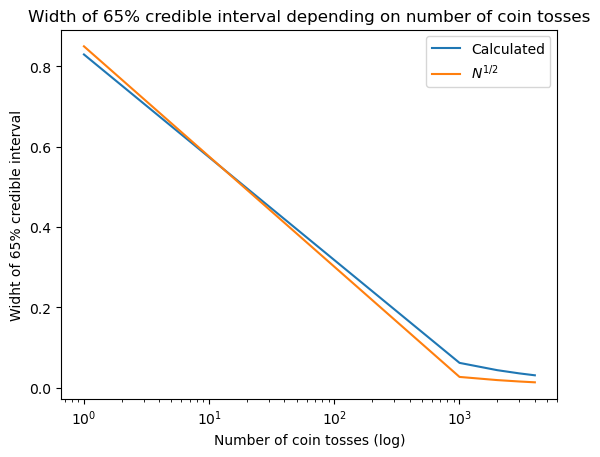

In [9]:
# Explore the dependence of the width of the 95% DoB on the number of coin tosses.
# 
# YOUR CODE HERE
# 
N = np.arange(1, 4096, 1000)

dob68 = bayesian_analysis_coin_flips(data[:1])[4]
d68 = dob68[1]-dob68[0]
#def d68(n):
for n in N[1:]:
    dob68 = bayesian_analysis_coin_flips(data[:n])[4]
    d68_new = dob68[1]-dob68[0]
    d68 = np.append(d68, d68_new)

plt.title('Width of 65% credible interval depending on number of coin tosses')
plt.plot(N, d68, label='Calculated')
plt.plot(N, 0.85*N**(-1/2), label=r'$N^{1/2}$')
plt.xlabel('Number of coin tosses (log)')
plt.ylabel('Widht of 65% credible interval')
plt.legend()
plt.semilogx()
plt.show()

## Problem 2: The lighthouse problem (2 points)

A light house is located at position $\alpha$ along a straight shoreline and a distance $\beta$ out at sea. It cannot be seen in the dark, but it emits lightpulses at random intervals (and therefore in random directions). Photodetectors on the shore detects the positions of the arrival of the falshes, but it cannot measure its incoming direction. Given the positions of $N$ such flashes
$$
\mathcal{D} = \{ x_k \}_{k=1}^N,
$$
what would you infer for the position $(\alpha, \beta)$ of the lighthouse?

- You can assume that the directions (azimuths) of the flashes are independent and identically distributed random variables given by a uniform distribution $\theta_k \sim \mathcal{U}\left( \pi/2, \pi/2\right)$.
- Trigonometry relates $\beta \tan\theta_k = (x_k - \alpha)$ and you can use a change of variables to write the likelihood of one observation
  $$
  p(x_k \vert \alpha, \beta, I) = p(\theta_k \vert \alpha, \beta, I) \left| \frac{d\theta_k}{d x_k} \right| = \ldots = \frac{\beta}{\pi\left[ \beta^2 + (x_k - \alpha)^2\right]}.
  $$
- You can use simple, uniform priors for $(\alpha, \beta)$. Assume that the prior ranges are restricted to $-5.0 \leq \alpha \leq +5.0$ and $0.1 \leq \beta \leq 5.0$. 

### (a) Evaluate the (log) posterior.
**Tasks (see also Yata)** 
* Define functions `logPrior`, `logLikelihood`, and `logPosterior` that can evaluate these PDF:s on a grid of $(\alpha, \beta)$ values.

In [4]:
# Importing modules if needed...

# 
# YOUR CODE HERE
# 
import numpy as np

In [7]:
# Read data
xpositions = np.loadtxt(f'{DATA_DIR}/PS2_Prob2_xpositions.txt')

In [8]:
def logPrior(theta):
    '''
    Returns the log uniform prior (-5. <= alpha <= 5., 0.1 <= beta <= 5.) for a grid of theta.
    
    Args
    ----
    theta : ndarray, shape=(Nsamples,2)
        theta[:,0] = alpha, theta[:,1] = beta
        
    Returns
    -------
    logPi : ndarray(Nsamples,)
        log prior (not necessarily normalized) for the grid of theta.
    '''
    # 
    # YOUR CODE HERE
    # 

    logPi = np.zeros_like(theta[:,0])
    alpha = theta[:,0]
    beta = theta[:,1]
    logPi[(np.abs(alpha) > 5.) | (beta < 0.1) | (beta > 5.)] = -np.inf
    return logPi


def logLikelihood(theta, x):
    '''
    Returns the log likelihood for a grid of theta.
    
    Args
    ----
    theta : ndarray, shape(Nsamples, 2)
        theta[:,0] = alpha, theta[:,1] = beta
    x : nddata, shape=(Ndata,)
        array of positions for measured flashes
        
    Returns
    -------
    logL : ndarray, shape=(Nsanples,) 
        log likelihood (not necessarily normalized) for the grid of theta.
    '''
    # 
    # YOUR CODE HERE
    # 
    alpha = theta[:,0]
    beta = theta[:,1]
    logL_k = np.sum(np.log(beta/(np.pi*(beta*beta + (x[:,None] - alpha)*(x[:,None] - alpha)))), 0)
    return logL_k

def logPosterior(theta, x):
    '''
    Return the log posterior (not necessarily normalized).
    '''
    # 
    # YOUR CODE HERE
    # 

    return logPrior(theta) + logLikelihood(theta,x)

In [9]:
# Tests of the prior
assert isinstance(logPrior(np.ones((1,2)))[0], (np.floating, float)), \
    'The output elements of the prior should be floats'
assert logPrior(np.zeros((1,2)))==-np.inf, \
    'The prior = 0 for beta=0.'
assert logPrior(np.ones((5,2))).shape == (5,), \
    'The prior output should be of shape (5,) with 5 input positions.'
# Tests of the likelihood
assert isinstance(logLikelihood(np.ones((1,2)),xpositions[:256])[0], (np.floating, float)), \
    'The output elements of the likelihood should be floats'
assert logLikelihood(np.ones((5,2)),xpositions).shape == (5,), \
    'The likelihood output should be of shape (5,) with 5 input positions and data.'
# Tests of the posterior
assert(np.isclose((logPosterior(np.ones((1,2)),xpositions[:4]) - logPosterior(0.5*np.ones((1,2)),xpositions[:4]) \
                       + logPosterior(np.ones((1,2)),xpositions[:2]) - logPosterior(0.5*np.ones((1,2)),xpositions[:2]))[0], 3.88864673)), \
       'The log posterior has an incorrect dependence on the observations.'
assert(np.isclose((logPosterior(np.ones((1,2)),xpositions) - logPosterior(2*np.ones((1,2)),xpositions))[0], -295.0531449)), \
        'The log posterior has an incorrect dependence on the position.'

### (b) Evaluate the (log) posterior on a grid and find the mode.
**Tasks (see also Yata)** 
* Create a grid of $(\alpha, \beta)$ values and evaluate the log posterior for different amounts of available data. The data is loaded into the array `xpositions` in the cell below. Make a 3x3 figure with `subplots` and plot the posterior (not the log!) for the $N = (2, 3, 4, 8, 16, 32, 64, 128, 1024)$ first observations. You need to be careful in choosing the number of grid points in each direction as the number of evaluations scales quadratically with this number.
* You should use the supplied method `contour_levels` to extract the isoprobability levels that define (0.68, 0.95, 0.997) credible regions. This method takes a 2D grid of PDF values (not necessarily normalized) as an input. These levels can be plotted using the `contour` method.
* Use `scipy.optimize` to find the mode of the posterior for the full set of observations with four significant digits. Which coordinate is inferred with the best precision from the observations?

(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


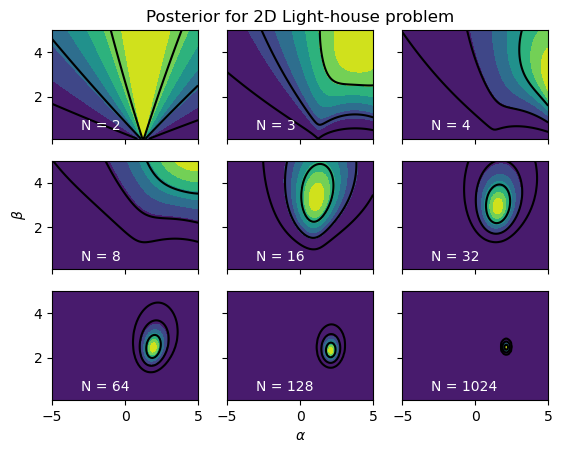

In [12]:
# Create a grid and evaluate the log-posterior. Plot the bivariate posterior PDF.

# We'll start by defining a function which takes a two-dimensional grid of probability densities and 
# returns 1, 2, and 3-sigma contours. This acts by sorting and normalizing the values and then 
# finding the locations of the  0.682 ,  0.952 , and  0.9972  cutoffs:
def contour_levels(grid):
    """Compute 1, 2, 3-sigma contour levels for a gridded 2D pdf"""
    _sorted = np.sort(grid.ravel())[::-1]
    pct = np.cumsum(_sorted) / np.sum(_sorted)
    cutoffs = np.searchsorted(pct, np.array([0.68, 0.95, 0.997]) ** 2)
    return np.sort(_sorted[cutoffs])

# 
# YOUR CODE HERE
# 
alpha = np.linspace(-5., 5., 100)
beta = np.linspace(0.1, 5., 100)

A, B = np.meshgrid(alpha, beta)
theta = np.column_stack((A.ravel(), B.ravel()))
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True)

N = [2, 3, 4, 8, 16, 32, 64, 128, 1024]
for i, n in enumerate(N):
    logPos = logPosterior(theta, xpositions[:n]).reshape(100,100)
    logPos -= np.max(logPos)
    posterior = np.exp(logPos)
    col = i//3
    row = i%3
    ax[col][row].contourf(A, B, posterior)
    ax[col][row].contour(A, B, posterior, contour_levels(posterior), colors='black')
    ax[col][row].text(-3, 0.5, f'N = {n}', color='white')
ax[2][1].set_xlabel(r'$\alpha$')
ax[1][0].set_ylabel(r'$\beta$')
ax[0][1].set_title('Posterior for 2D Light-house problem')
plt.show()

In [11]:
# Find the MAP point (maximum a posteriori) for full data set.
#
# You might want to use functionality from scipy to find the mode.
#
# 
# YOUR CODE HERE
# 
logpos = lambda theta: -logPosterior(np.reshape(theta, (1,2)), xpositions)
op = scipy.optimize.minimize(logpos, [0,1])
print(op)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3553.0753528313353
        x: [ 2.126e+00  2.463e+00]
      nit: 10
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 1.012e-02  1.016e-03]
            [ 1.016e-03  1.241e-02]]
     nfev: 37
     njev: 12


C:\Users\elsaz_6\miniconda3\envs\tif285-env\Lib\site-packages\scipy\optimize\_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


## Problem 3: MCMC sampling using the random walk Metropolis algorithm (3 points)
Note that you have to have solved problem 2 before starting on this problem.

Say that we have some function that tells us the (possibly unnormalized) probability density for a given position in a multi-dimensional space. That is, the function is proportional to a multivariate pdf. 

Note that we will work with the log posterior and you will have to be careful when computing the acceptance ratio.

In this task we will use the (log) posterior pdf from problem 2 but the approach is very general. All that is needed is some function that, for each position in the parameter space, returns a number that is proportial to the (log) probability density. You should deliberately remove all normalization constants to make the point that sampling can be made for an unnormalized pdf. 

Note that the `log_posterior_func` used as input to the sampler should just take an array of the position $(\alpha,\beta)$ as input. The very simple function below achieves this using the `logPosterior` function from Problem 2. Note that we will sample the posterior obtained with N=128 observations and that we just need to evaluate for one position at a time.

In [16]:
def logPosteriorFunc(theta):
    return logPosterior(theta.reshape(1,2), xpositions[:128])[0]

### (a) Construct a Metropolis sampler for the bivariate posterior distribution from problem 2

**Task (see also Yata)** Now on to constructing the sampler. The code for a MCMC sampler that uses the Metropolis algorithm is enclosed below. However, it misses a few critical ingredients and your task is to add these at the correct places.

1. At first, you have to specify the initial parameter position (that can be randomly chosen), lets fix it to the input argument `start_position`:

```python
current_position = start_position
```

Then, you propose to move (jump) to another position. You can be very dumb or very sophisticated about how you come up with the proposed jump. The Metropolis sampler is rather dumb and just picks a sample from a symmetric proposal distribution.

2. Use `scipy.stats.multivariate_normal` to create `proposed_position` as a sample from a random variable that is described by a multivariate normal distribution with the mean value equal to the `current_position` and a diagonal covariance matrix with fixed standard deviation in all dimensions (`proposal_width`) that will determine the length scale for proposed jumps. Note that you must include the keyword argument `seed=rng` to use the input Generator to draw random numbers.

Next, you evaluate whether that new position is a good place to jump to, or not. We quantify this by comparing the probability density at the `proposed_position` with the one for the `current_position`. Note that you are computing the logarithms of the probability densities but the ratio is for the probability densities at the two positions.

3. Compute both `logp_current` and `logp_proposal` and from them the acceptance probability `p_accept`.

Note that the acceptance probability is obtained by dividing the pdf of the proposed parameter setting by the pdf of the current parameter setting. This implies that the probability density does not necessarily need to be normalized, the normalization factor will anyway cancel out. 

You can see that if `p_proposal` is larger, the acceptance probability will be `> 1` and we'll definitely accept the jump. However, if `p_current` is larger, say twice as large, there'll just be a 50% chance of moving to the proposed position. The acceptance of a proposed step will be decided by sampling another random number.

4. Incorporate the acceptance step by comparing `p_accept` to a random number (uniform [0,1]). The `current_position` should be updated if the `accept` variable is `True`. 

Note that the `current_position` is added to our list of parameter samples at the end of the iteration, regardless of it being a new position or not.

This simple procedure gives us samples from the pdf.

In [17]:
# Modules
import numpy as np
import scipy.stats as stats

def sampler(log_posterior_func, Ndim, no_of_samples=4, start_position=[], 
            proposal_width=1., rng=np.random.default_rng()):
    '''
    Metropolis sampler function for a multi-dimensional pdf.
    
    Args:
        log_posterior_func: Function 
            Function that takes `Ndim` positional arguments and returns 
            the logarithm of the (possibly unnormalized) pdf.
        Ndim: int
            Number of parameter dimensions
        no_of_samples: int 
            Number of samples that will be returned (including the start position). 
        start_position: array_like, default []
            Start position. Set as np.ones(Ndim) if start_position==[]
        proposal_width: float 
            Width of symmetric Gaussian proposal distribution.
        rng: Generator, default np.random.default_rng()
            A random number generator that will be used for all random number samples.
        
    Returns:
        ndarray (no_of_samples,Ndim)
            MCMC samples
    '''
    # starting parameter position
    # Set the start position as np.ones(Ndim) if start_position=[]
    # 
    # YOUR CODE HERE
    # 
    if start_position == []:
        start_position = np.ones(Ndim)
    else:
        start_position = np.array(start_position)

    current_position = start_position
    samples = current_position
    
    # fixed covariance matrix
    cov = np.eye(len(current_position))*proposal_width**2
    
    # Sampling loop
    for i in range(no_of_samples-1):
        # suggest new position
        # 
        # YOUR CODE HERE
        # 
        suggested_position = stats.multivariate_normal(current_position, cov, seed=rng).rvs()

        # Compute posteriors of current and proposed position   
        # Also compute the acceptance probability
        # 
        # YOUR CODE HERE
        # 
        
        logp_current = log_posterior_func(current_position)
        logp_proposed = log_posterior_func(suggested_position)
        p_accept = np.exp(logp_proposed - logp_current) #+S!

        # Accept proposal?
        # 
        # YOUR CODE HERE
        # 

        accept = False
        u = rng.random()
        if p_accept >= u:
            accept = True
        
        # Possibly update position
        # 
        # YOUR CODE HERE
        # 
        if accept: current_position = suggested_position
        
        samples = np.vstack((samples,current_position))
    return np.array(samples)


The following code cell performs some first tests of the functionality of your sampler. 

In [18]:
# Tests of the sampler functionality
#
# One-dimensional test PDF
#
def log_posterior_function_1d_test(x):
    '''
    Return the log posterior pdf given by a standard Cauchy (Lorentzian). Not normalized.
    
    Args:
        x: position in a one-dimensional space
    '''
    return np.log( 1 / (1+x**2) )

my_rng = np.random.default_rng(seed=2020)
test_samples = sampler(log_posterior_function_1d_test, 1, no_of_samples=5, \
                       start_position=[.5],rng=my_rng)

assert len(test_samples)==5, 'The sampler chain should contain the specified number of samples'
assert test_samples[0]==0.5, 'The first position sample should be the default start position = 0.5'
assert test_samples[1]==0.5, 'The second position will be the same as the start position given this RNG.'



In [19]:
# Tests of the sampler with the posterior from Problem 2
#
my_rng = np.random.default_rng(seed=2020)
test_samples_2D = sampler(logPosteriorFunc, 2, no_of_samples=5, \
                       start_position=[],rng=my_rng)

assert test_samples_2D.shape==(5,2), 'The sampler chain should contain the specified number of samples'
assert (test_samples_2D[0,:]==np.ones(2)).all(), 'The first position sample should be the default start position. '
assert (test_samples_2D[2,:]!=np.ones(2)).all(), 'The third position will be different than the start position given this RNG.'


### (b) Sampling the posterior
**Task (see also Yata)** Draw 100,000 samples from your sampler:
* Plot the traces (i.e. the sequence of draws of the two parameters $(\alpha, \beta)$.)
* Plot the bivariate posterior PDF as well as the univariate marginal distributions for each parameter. You can use the `corner` package to achieve this. A sample code is provided below.

In [20]:
my_proposal_width=0.5

try:
    samples = sampler(logPosteriorFunc, 2, no_of_samples=100000, proposal_width=my_proposal_width, start_position=[])
except:
    samples=None
    print('The method "sampler" must be defined and working as expected.')

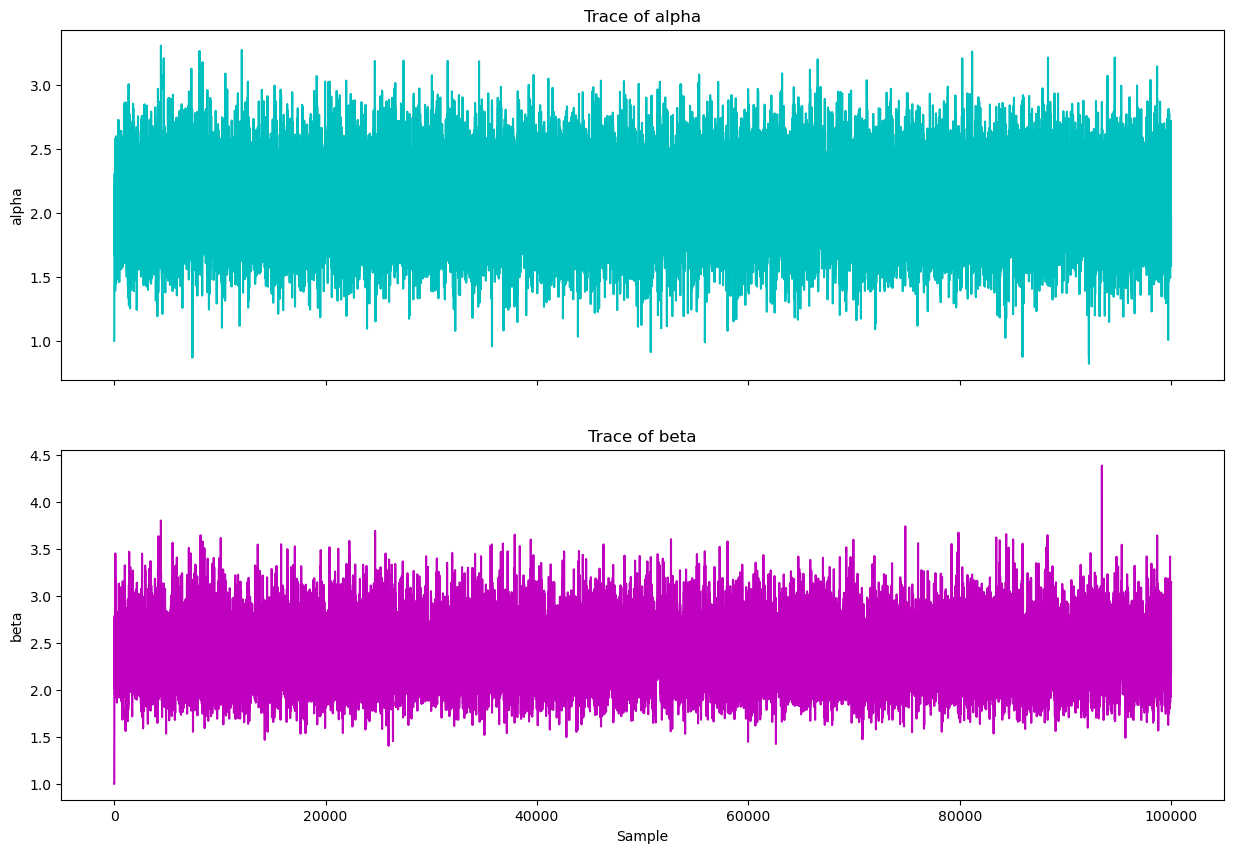

In [21]:
# Plot the traces
#
# 
# YOUR CODE HERE
# 
x = np.arange(100000)
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15,10))
ax[0].plot(x, samples[:,0], 'c')
ax[1].plot(x, samples[:,1], 'm')
ax[1].set_xlabel('Sample')
ax[0].set_ylabel('alpha')
ax[1].set_ylabel('beta')
ax[0].set_title('Trace of alpha')
ax[1].set_title('Trace of beta')
plt.show()

In [22]:
# If the code works as expected your trace of samples should have a median value close to 2.102, 2.3781
assert np.isclose(np.median(samples, axis=0)[0],2.102, rtol=0.01), \
    f'The median of the alpha samples is {np.median(samples, axis=0)[0]:5.2f}. It should be close to the median of the posterior pdf.'
assert np.isclose(np.median(samples, axis=0)[1],2.378, rtol=0.01), \
    f'The median of the beta samples is {np.median(samples, axis=1)[0]:5.2f}. It should be close to the median of the posterior pdf.'

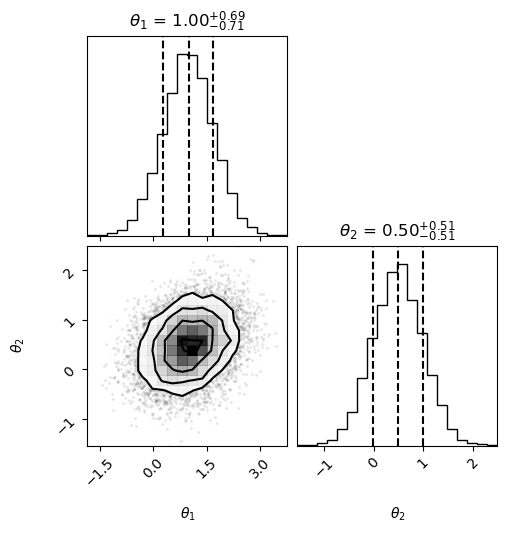

In [23]:
# Sample code to make a corner plot with dashed lines indicating 16%, 50%, 84% quantiles
# i.e. showing the median and the 68% equal-tail interval

# Samples from a correlated, bivariate normal distribution
my_mean = np.array([1., 0.5])
my_cov = np.array([[0.5, 0.1],[0.1,0.25]])
mysamples = stats.multivariate_normal(mean=my_mean, cov=my_cov).rvs(size=10000)

import corner
corner.corner(mysamples,labels=[r"$\theta_1$", r"$\theta_2$"],show_titles=True,
                       quantiles=[0.16, 0.5, 0.84],);

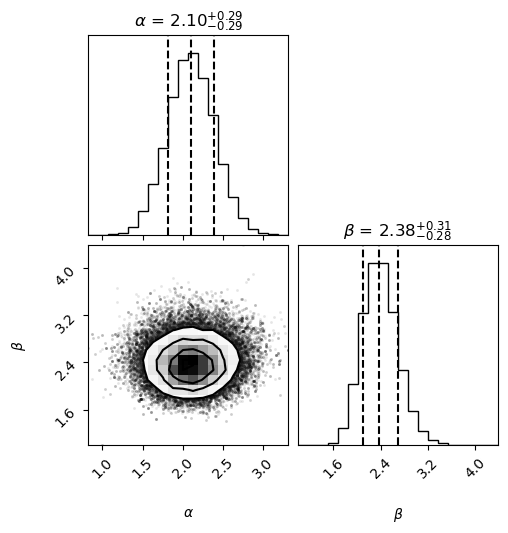

In [24]:
# Plot the posterior PDF from your MCMC samples
# 
# YOUR CODE HERE
# 
corner.corner(samples,labels=[r"$\alpha$", r"$\beta$"],show_titles=True,
                       quantiles=[0.16, 0.5, 0.84],);

### (c) Autocorrelation length

This problem might be more demanding than (a) and (b) since it requires reading up on autocorrelation and the extraction of an autocorrelation length.

A challenge when doing MCMC sampling is that the collected samples can be *correlated*. This can be tested by computing the *autocorrelation function* and extracting the correlation time for each dimension in a chain of samples.

Say that $X$ is an array of $N$ samples of one parameter numbered by the index $t$. Then $X_{+h}$ is a shifted version of $X$ with elements $X_{t+h}$. The integer $h$ is called the *lag*. Since we have a finite number of samples, the array $X_{+h}$ will be $h$ elements shorter than $X$. 

Furthermore, $\bar{X}$ is the average value of $X$.

We can then define the autocorrelation function $\rho(h)$ from the list of samples. 
$$
\rho(h) = \frac{\sum_{t=0}^{N-h-1} \left[ (X_t - \bar{X}) (X_{t+h} - \bar{X})\right]}
{\sqrt{ \sum_{t=0}^{N-h-1} (X_t - \bar{X})^2 } \sqrt{ \sum_{t=0}^{N-h-1} (X_{t+h} - \bar{X})^2 }}
$$
The summation is carried out over the subset of samples that overlap.

* It is often observed that $\rho(h)$ is roughly exponential so that we can define an autocorrelation time $\tau$ according to
$$
\rho(h) \sim \exp(-h/\tau).
$$
* Try to understand what the autocorrelation time measures and why it is large (small) when the samples are correlated (not correlated). A short explanation of the autocorrelation function is found below\*.

\* *The autocorrelation is the overlap (scalar product) of the chain of samples (the trace) with a copy of itself shifted by the lag, as a function of the lag. If the lag is short so that nearby samples are close to each other (and have not moved very far) the product of these two vectors is large. If samples are independent, you will have both positive and negative numbers in the overlap that cancel each other.*

**Task (see also Yata)** 
* Implement functions to compute the acceptance ratio and the autocorrelation for a  chain of MCMC samples.
* Study the samples of the posterior from task b and extract both the autocorrelation time $\tau$ and the acceptance ratio $r$ for $\alpha$ and $\beta$. While not required, it is recommended to verify your extracted autocorrelation times by plotting the computed autocorrelation together with the exponential decay $\exp(-h/\tau)$.
* Restrict the sampling to 10,000 samples and use a max lag of 2,000.
* Use some different choices of the proposal width: 0.01, 0.05, 0.1, 0.5. What is a good choice for sampling this distribution?

In [25]:
def acceptance_ratio(chain):
    '''
    Returns the acceptance ratio for a MCMC chain
    
    Args:
        chain: ndarray with MCMC samples. The length of axis-0 
            corresponds to the number of samples and the length of axis-1
            to the number of parameters
            
    Returns:
        r: Acceptance ratio (float). Note that 0 <= r <= 1.0
            We define r = number of accepted proposed steps / # proposed steps
            where we note that the # propsed steps = # samples - 1
    '''
    
    # 
    # YOUR CODE HERE
    # 
    N_accepted = np.shape((np.unique(chain, axis=0)))[0] - 1
    N_proposed = np.shape(chain)[0] - 1
    return N_accepted/N_proposed


In [26]:
# In this one-dimensional chain we have accepted two proposed steps out of four (the first one is the starting point)
chain_1d = np.array([0., 0., 1., 2., 2.])
assert np.isclose( acceptance_ratio(chain_1d), 0.5)
# In this two-dimensional chain we have accepted two proposed steps out of three (the first one is the starting point)
chain_2d = np.array([[0., 0.], [1., 2.], [1., 2.], [2., 2.]])
assert np.isclose( acceptance_ratio(chain_2d), 2./3.)

In [27]:
def autocorrelation(chain, max_lag):
    """
    Autocorrelation function rho(h) for a MCMC chain.
    
    Args:
        chain: ndarray with MCMC samples. The length of axis-0 
            corresponds to the number of samples, n_samples, and the length of axis-1
            to the number of parameters, ndim.
        max_lag: The maximum lag, h. (integer)
        
    Returns:
        acors: ndarray containing the autocorrelations rho(h) for each
                dimension of the chain separately.

    The shape of the returned array is
        -> (max_lag+1, ndim) if the shape of chain is (n_samples, ndim)
        -> (max_lag+1,) if the shape of the chain is (n_samples,).
    """
    # 
    # YOUR CODE HERE
    # 
    X_mean = np.mean(chain, axis=0)
    N = np.shape(chain)
    if N == (N[0],):
        chain = np.reshape(chain, (N[0], 1))
        X_mean = np.array([X_mean])
    N = np.shape(chain)   
    sum_1 = np.zeros((max_lag+1, N[1]))
    sum_2 = np.zeros((max_lag+1, N[1]))
    sum_3 = np.zeros((max_lag+1, N[1]))

    chain_mean = chain - X_mean
    for k in range(max_lag+1):
        sum_1[k] = np.sum(chain_mean[:N[0]-k]*chain_mean[k:N[0]], axis=0)
        sum_2[k] = np.sum(chain_mean[:N[0]-k]*chain_mean[:N[0]-k], axis=0)
        sum_3[k] = np.sum(chain_mean[k:N[0]]*chain_mean[k:N[0]], axis=0)

    acors = sum_1/(np.sqrt(sum_2)*np.sqrt(sum_3)) 
    return acors            


In [28]:
# Create a correlated one-dimensional chain of samples.
chain = np.exp(-np.arange(100)/10)
max_lag=10
acor = autocorrelation(chain, max_lag)
# Zero lag => max correlation
assert np.isclose(acor[0],1.)
assert np.abs( acor[-1]-0.75719323 ) < 0.001

Two-dimensional MCMC sampling

width   acc. ratio   tau[a]   tau[b]    <a>     <b>
 0.01      0.98        925.637504     766.778927    2.10   2.38
 0.05      0.91        195.013149     160.033634    2.10   2.38
 0.10      0.84        40.584177     57.226037    2.10   2.38
 0.50      0.35        13.826825     6.471566    2.10   2.38


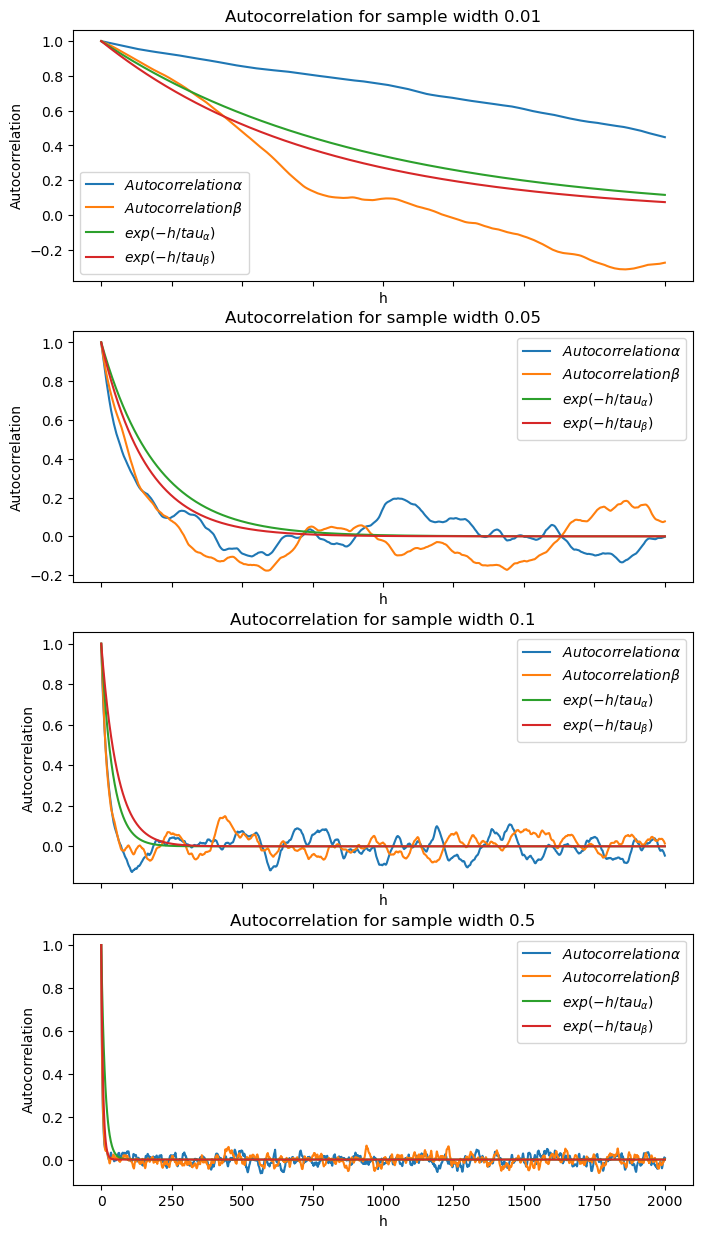

In [29]:
# Use the four different proposal widths (indicated above) and extract the acceptance ratio and the correlation time(s) 
# for bivariate posterior PDF of Problem 3b. Use 10,000 samples for each sampling and a max lag of 2,000.
# Print also the median values of the sampled parameters.
print('Two-dimensional MCMC sampling\n')
print('width   acc. ratio   tau[a]   tau[b]    <a>     <b>')
no_of_samples=10000
fig, ax = plt.subplots(4,1, sharex=True, figsize=(8,15))

for iax, width in enumerate([0.01, 0.05, 0.1, 0.5]):
    # 
    # YOUR CODE HERE
    # 
    lag_max = 2000
    samples_autocorr = sampler(logPosteriorFunc, 2, no_of_samples, proposal_width=width, start_position=[])
    acc_ratio = acceptance_ratio(samples_autocorr)

    autocorr = autocorrelation(samples_autocorr, lag_max)
    tau = 1 + 2*np.sum(autocorr[:500], axis=0)
    x=np.arange(2001)
    ax[iax].plot(x, autocorr[:2001,0], label=r'$Autocorrelation \alpha$')
    ax[iax].plot(x, autocorr[:2001,1], label=r'$Autocorrelation \beta$')
    ax[iax].plot(x, np.exp(-x/tau[0]), label=r'$exp(-h/tau_{\alpha})$')
    ax[iax].plot(x, np.exp(-x/tau[1]), label=r'$exp(-h/tau_{\beta})$')
    ax[iax].set_xlabel('h')
    ax[iax].set_ylabel('Autocorrelation')
    ax[iax].set_title(f'Autocorrelation for sample width {width}')
    ax[iax].legend()
    
    print(f' {width:.2f}      {acc_ratio:.2f}        {tau[0]:4f}     {tau[1]:4f}',\
         f'   {np.median(samples[:,0]):4.2f}   {np.median(samples[:,1]):4.2f}')
plt.show()

## Problem 4: Bayesian linear regression (3 points)

We will be fitting a linear model (in this case a first order polynomial) to a set data. Our model has two parameters $\vec\theta=[\theta_0,\theta_1]$ (pay attention to the indexing)

$$
y_M(x) = \theta_0 + \theta_1 x 
$$

And our statistical model assumes that errors are independent and identically distributed

$$
y_i = y_M(x_i;\theta) + \varepsilon_i.
$$

Specifically, $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$ and we assume a fixed standard deviation $\sigma = 40$. 

(Note that the $\varepsilon_i \sim \ldots$ notation means that $\varepsilon_i$ is a draw of a random variable that follows the specified distribution.)

The data is generated from a straight line with intercept = 15. and slope = 1.5 plus random noise.

In [30]:
intercept = 15.
slope = 1.5
theta_true = np.array([intercept, slope])
sigma=40.

Read the data from the file `PS2_Prob4_data.txt`.

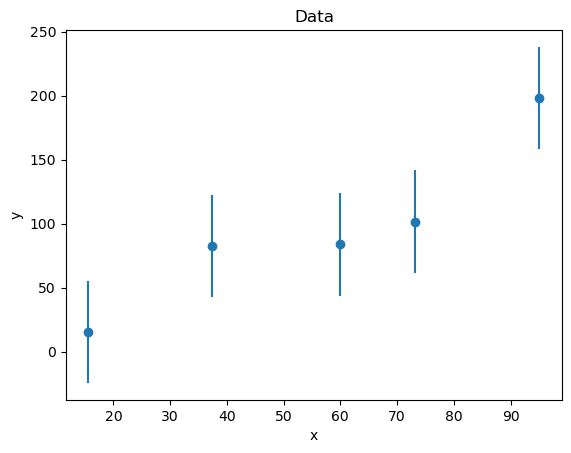

In [31]:
# Load the data and plot with fixed error bar 
# Use np.loadtxt() for loading data (the argument 'unpack=True' is useful)
# and plt.errorbar() for plotting data with errorbars

# 
# YOUR CODE HERE
# 
data = np.loadtxt(f'{DATA_DIR}/PS2_Prob4_data.txt', unpack=True)

plt.errorbar(data[0], data[1], sigma, fmt='o')
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### (a) Bayesian linear regression: Implement log prior(s) and likelihood

**Task (see also Yata)** Create functions that return the natural logarithm of the likelihood and two different choices of prior. Since we are seeking a parameter posterior you do not have to use proper normalization of the probability densities. 

Consider two different choices for the prior:
1. A uniform prior:
   $$
   p(\theta_0, \theta_1 | I) \propto \left\{ \begin{array}{ll} 1 & \text{if } -100 \le \theta_0 \le 100 \text{ and } -100 \le \theta_1 \le 100 \\ 0 & \text{else} \end{array}\right.
   $$
2. A uniform prior for the intercept and a symmetry-invariant one for the slope
   $$
   p(\theta_0, \theta_1 | I) \propto \left\{ \begin{array}{ll} \frac{1}{(1+\theta_1^2)^{3/2}} & \text{if } -100 \le \theta_0 \le 100  \\ 0 & \text{else}\end{array}\right.
   $$

In [32]:
def log_flat_prior(theta):
    '''
    Returns the log uniform prior (-100 <= theta_i <= 100)
    
    Args:
        theta: array of floats with two elements. theta[0]=intercept. theta[1]=slope
        
    Returns:
        logPi: (float) log prior (not necessarily normalized)
    '''
    # 
    # YOUR CODE HERE
    # 
    log_prior = 0.
    if (np.abs(theta[0])>100) | (np.abs(theta[1])>100):
        log_prior = -np.inf
    return log_prior
    
def log_symmetric_prior(theta):
    '''
    Returns the log uniform (for theta_0) and symmetric (for theta_1) prior 
    
    (-100 <= theta_0 <= 100; p(theta_1) propto (1+theta_1^2)^(-3/2))
    
    Args:
        theta: array of floats with two elements. theta[0]=intercept. theta[1]=slope
        
    Returns:
        logPi: (float) log prior (not necessarily normalized)
    '''
    # 
    # YOUR CODE HERE
    # 
    log_prior = -np.inf
    if np.abs(theta[0])<=100:
        log_prior = np.log(1/((1+theta[1]*theta[1])**(3/2)))    
    return log_prior

In [33]:
assert isinstance(log_flat_prior([0.,0.]), (np.floating, float)), 'The output should be a float'
assert isinstance(log_symmetric_prior([0.,0.]), (np.floating, float)), 'The output should be a float'
assert log_flat_prior([0.,0.]) - log_flat_prior([10.,-10.]) == 0., 'The flat prior should be constant in the interval'
assert np.abs(log_symmetric_prior([-10.,1.]) - log_symmetric_prior([20.,2.]) - 1.3744360978112324) <0.001, \
'The log symmetric prior does not evaluate correctly.'

In [34]:
def log_likelihood(theta, x, y, dy=sigma):
    '''
    Returns the log likelihood.
    
    Args:
        theta: array of floats with two elements. theta[0]=intercept. theta[1]=slope
        x: data (independent variable). array of floats
        y: data (dependent variable). array of floats
        dy: fixed error (optional; default=sigma defined above), standard deviation of a normal distribution
        
    Returns:
        logL: (float) log likelihood
    '''
    # 
    # YOUR CODE HERE
    # 
    N = len(x)
    X = np.column_stack((np.ones_like(x), x))
    log_likelihood = -N/2*np.log(2*np.pi*dy*dy) - 1/(2*dy*dy)*(y - X@theta).T@(y-X@theta)
    return log_likelihood

In [35]:
x_test,y_test = np.loadtxt(f'{DATA_DIR}/PS2_Prob4_data.txt',unpack=True)
assert isinstance(log_likelihood([0,0], x_test, y_test), (np.floating, float)), 'The output should be a float'
assert np.abs(log_likelihood([0.,0.], x_test, y_test) - log_likelihood([10.,1.], x_test, y_test) + 16.588440096874997) <0.001, \
'The log likelihood does not evaluate correctly.'

### (b) Use MCMC sampling and plot the posterior for the two different prior choices

**Tasks (see also Yata)**
* Where is the mode of the posterior with these two different priors?
* Use your sampling code, or use the `emcee` package, to collect 100,000 samples of the posterior with these two different priors.
* Plot the joint posterior pdf for the two different prior choices using `corner`. Use the keyword argument `truths` to indicate the "true" values of the parameters that generate the data (in the array `theta_true` defined at the start of this problem).
* Are the parameters correlated / anti-correlated?

In [36]:
# Collect samples from the posterior with the flat prior
# 
# YOUR CODE HERE
# 
def log_posterior_flat(theta): 
    x = data[0]
    y = data[1]
    dy = sigma
    log_posterior = log_flat_prior(theta) + log_likelihood(theta, x, y, dy)
    return log_posterior

#samples_flat = sampler(log_posterior_flat, 2, no_of_samples=100000, proposal_width=1, start_position=[])
N_walkers = 10  
sampler = emcee.EnsembleSampler(N_walkers, 2, log_posterior_flat)
theta_start = np.random.rand(N_walkers,2)
sampler.run_mcmc(theta_start, 100000)
samples_flat = sampler.get_chain(flat=True)

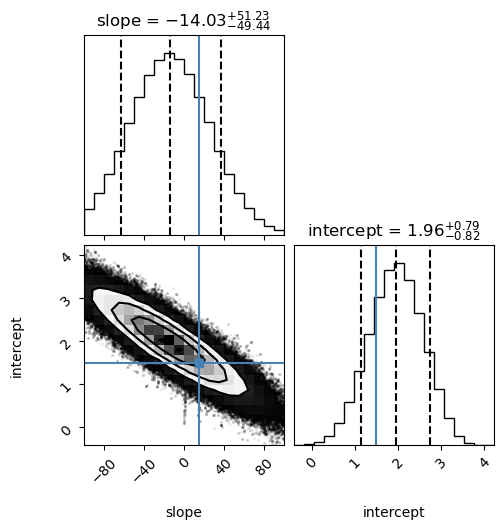

In [37]:
# Make a corner plot of the posterior with the flat prior.
# 
# YOUR CODE HERE
# 
corner.corner(samples_flat,labels=['slope', 'intercept'],show_titles=True,
                       quantiles=[0.1, 0.5, 0.9],truths = theta_true);

In [38]:
# Collect samples from the posterior with the symmetric prior
# 
# YOUR CODE HERE
# 
def log_posterior_symmetric(theta): 
    x = data[0]
    y = data[1]
    dy = sigma
    log_posterior = log_symmetric_prior(theta) + log_likelihood(theta, x, y, dy)
    return log_posterior

#samples_sy = sampler(log_posterior_symmetric, 2, no_of_samples=100000, proposal_width=1, start_position=[])
N_walkers = 10  
sampler = emcee.EnsembleSampler(N_walkers, 2, log_posterior_symmetric)
theta_start = np.random.rand(N_walkers,2)
sampler.run_mcmc(theta_start, 100000)
samples_sy = sampler.get_chain(flat=True)

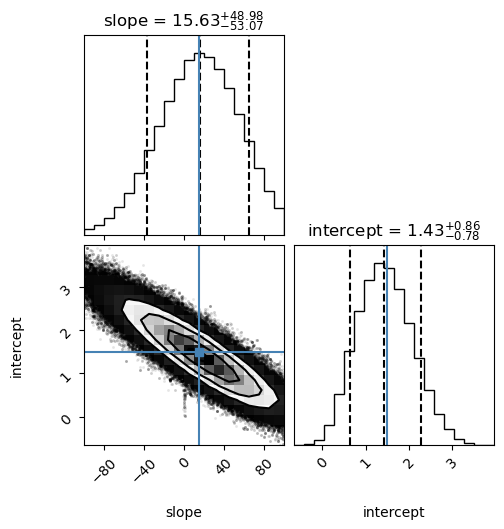

In [39]:
# Make a corner plot of the posterior with the symmetric prior.
# 
# YOUR CODE HERE
# 
corner.corner(samples_sy,labels=['slope', 'intercept'],show_titles=True,
                       quantiles=[0.1, 0.5, 0.9],truths = theta_true);

### (c) Unknown experimental error

Repeat the analysis but this time without knowledge of $\sigma$, the standard deviation of the experimental errors. That means that you need to include this width as an unknown (hyper-)parameter, $\sigma_e$, in your statistical model.

- Assume a uniform prior for the width in the range [1, 100]: $\sigma_e \sim \mathcal{U}(1,100)$.
- Restrict the analysis to using only the symmetric prior for the slope.

**Tasks (see also Yata)**
* Use your sampling code, or use the `emcee` package, to collect 500,000(!) samples of the posterior with the symmetric prior and the unknown error. There are now three parameters.
* Plot the joint posterior pdf using `corner`. Use the keyword argument `truths` to indicate the "true" values of the parameters that generate the data (the model parameters are in the array `theta_true` and the noise that was used is in the variable `sigma`).
* Study in particular the tails of the marginal posterior distributions for the slope and the intercept. Are they different from before when the width was fixed?

In [40]:
# Collect samples from the posterior with the symmetric prior and the unknown width
# 
# YOUR CODE HERE
# 
def log_symmetric_prior2(theta):
    log_prior = -np.inf
    if np.abs(theta[0])<=100 and 1<=theta[2]<=100:
        log_prior = np.log(1/((1+theta[1]*theta[1])**(3/2)))    
    return log_prior

def log_likelihood2(theta, x, y):
    N = len(x)
    X = np.column_stack((np.ones_like(x), x))
    dy = theta[2]
    log_likelihood = -N/2*np.log(2*np.pi*dy*dy) - 1/(2*dy*dy)*(y - X@theta[:2]).T@(y-X@theta[:2])
    return log_likelihood

def log_posterior(theta, x, y):
    return log_likelihood2(theta, x, y) + log_symmetric_prior2(theta)
    
theta_true2 = np.array([intercept, slope, sigma])

N_walkers = 10  
sampler = emcee.EnsembleSampler(N_walkers, 3, log_posterior, args=[data[0], data[1]])
theta_start = np.random.rand(N_walkers,3)
sampler.run_mcmc(theta_start, 50000)
samples = sampler.get_chain(flat=True)

C:\Users\elsaz_6\miniconda3\envs\tif285-env\Lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


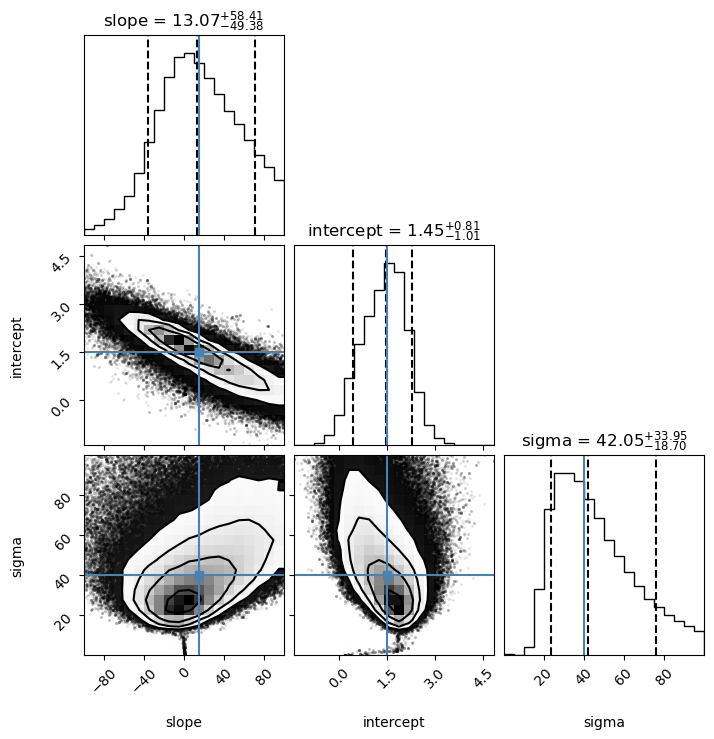

In [41]:
# Make a corner plot of the posterior with the symmetric prior and the unknown width
# 
# YOUR CODE HERE
# 
corner.corner(samples,labels=['slope', 'intercept', 'sigma'],show_titles=True,
                       quantiles=[0.1, 0.5, 0.9],truths = theta_true2);